<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [292]:
# Something new to install...
# ! pip install plotly

In [293]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [295]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [296]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [297]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [298]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [299]:
df['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [300]:
# Filter Data to Most Recent Year
df = df[df['year'] == df['year'].max()]

In [301]:
# Set Country to Index
df.set_index('country', inplace = True)

In [302]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns = ['iso_alpha', 'year', 'iso_num'], inplace = True)

In [303]:
# How many countries in each continent?
df['continent'].value_counts()

continent
Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: count, dtype: int64

In [304]:
continent_dummy = pd.get_dummies(df['continent'])

In [305]:
# Get dummies!
continent_dummy = pd.get_dummies(df['continent'])
df = pd.merge(df,continent_dummy, left_index=True, right_index=True)

In [306]:
# Head (again!)
df.head()

,continent,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania
country,,,,,,,,,
Afghanistan,Asia,43.82800,31889923,974.58034,False,False,True,False,False
Albania,Europe,76.42300,3600523,5937.02953,False,False,False,True,False
Algeria,Africa,72.30100,33333216,6223.36747,True,False,False,False,False
Angola,Africa,42.73100,12420476,4797.23127,True,False,False,False,False
Argentina,Americas,75.32000,40301927,12779.37964,False,True,False,False,False


In [307]:
# Define X

X = df.drop(columns = 'continent')

In [308]:
# Scale Features
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [309]:
X_sc.mean(), X_sc.std()

(9.851274725547164e-17, 1.0)

### II. K-Means Clustering Model

In [311]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")
# Avoid warning

In [312]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    
    inertia_list.append(kmeans.inertia_)

inertia_list    

[1136.0,
 851.3943291885334,
 644.4998731281249,
 411.7366992406043,
 291.8454018473185,
 145.1814036102372,
 132.08399415463637,
 86.88065308503914,
 73.78324362943833,
 71.80478625856458,
 49.40011614337159,
 42.44893607843758,
 37.88398277556891,
 35.88897058216842,
 31.822377727170068,
 28.682163752569878,
 26.30987207700496,
 24.48569330744809,
 21.851560743913065,
 21.38878329655591]

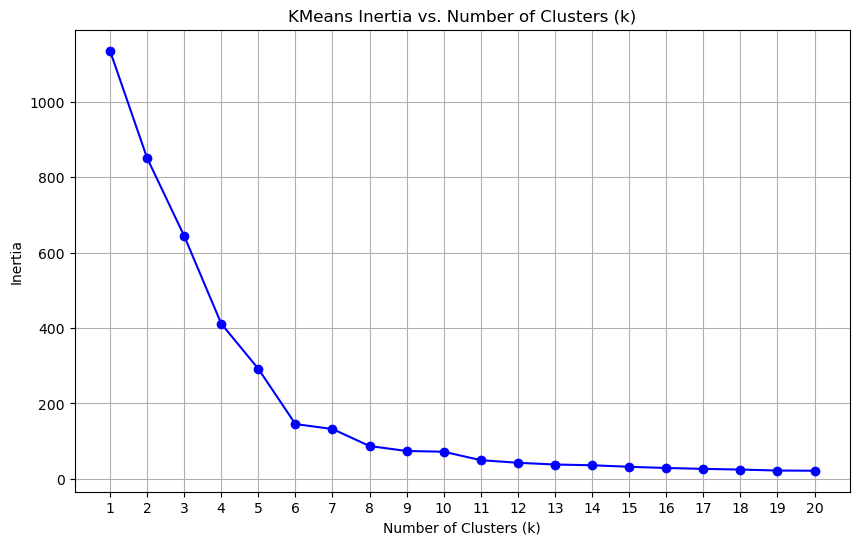

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia_list, marker='o', color='blue')
plt.title('KMeans Inertia vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [314]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    
    silhouette_list.append(silhouette_score(X_sc,kmeans.labels_))

silhouette_list

[0.353993404343515,
 0.45478931754261603,
 0.6190518825966604,
 0.6484307044757232,
 0.684136286873593,
 0.6769885846776716,
 0.6694268365333835,
 0.6668177290099369,
 0.6126827862458923,
 0.5320958451671851,
 0.5236092503740192,
 0.5128470087988583,
 0.48963119445599695,
 0.48266440303223057,
 0.4641032426315721,
 0.4420427116779873,
 0.42796358560294495,
 0.4453718251249586,
 0.4326173418205969]

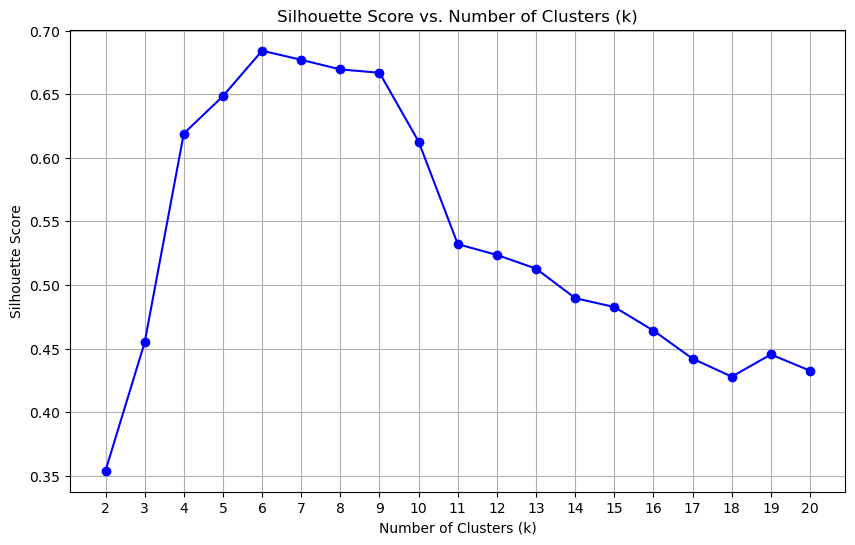

In [315]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_list, marker='o', color='blue')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

#### Based off of our metrics above, which k should we try first?

K = 6 should be tried first because it has the highest Silhouette Score and the K-means inertia does not decrease significantly beyond this value.

In [318]:
# Now let's try it!
km = KMeans(n_clusters=6, random_state=42)
    
# Instantiate & Fit
km.fit(X_sc)

KMeans(n_clusters=6, random_state=42)

In [319]:
# Silhouette Score
silhouette_score(X_sc,km.labels_)

0.684136286873593

#### Visualize Your Clusters!

In [321]:
# Add cluster column
df['km_cluster'] = km.labels_
df.head()

,continent,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania,km_cluster
country,,,,,,,,,,
Afghanistan,Asia,43.82800,31889923,974.58034,False,False,True,False,False,3
Albania,Europe,76.42300,3600523,5937.02953,False,False,False,True,False,1
Algeria,Africa,72.30100,33333216,6223.36747,True,False,False,False,False,2
Angola,Africa,42.73100,12420476,4797.23127,True,False,False,False,False,2
Argentina,Americas,75.32000,40301927,12779.37964,False,True,False,False,False,0


In [322]:
km.n_clusters

6

In [323]:
pd.Series(km.labels_).value_counts().sort_index()

0    25
1    30
2    52
3    31
4     2
5     2
Name: count, dtype: int64

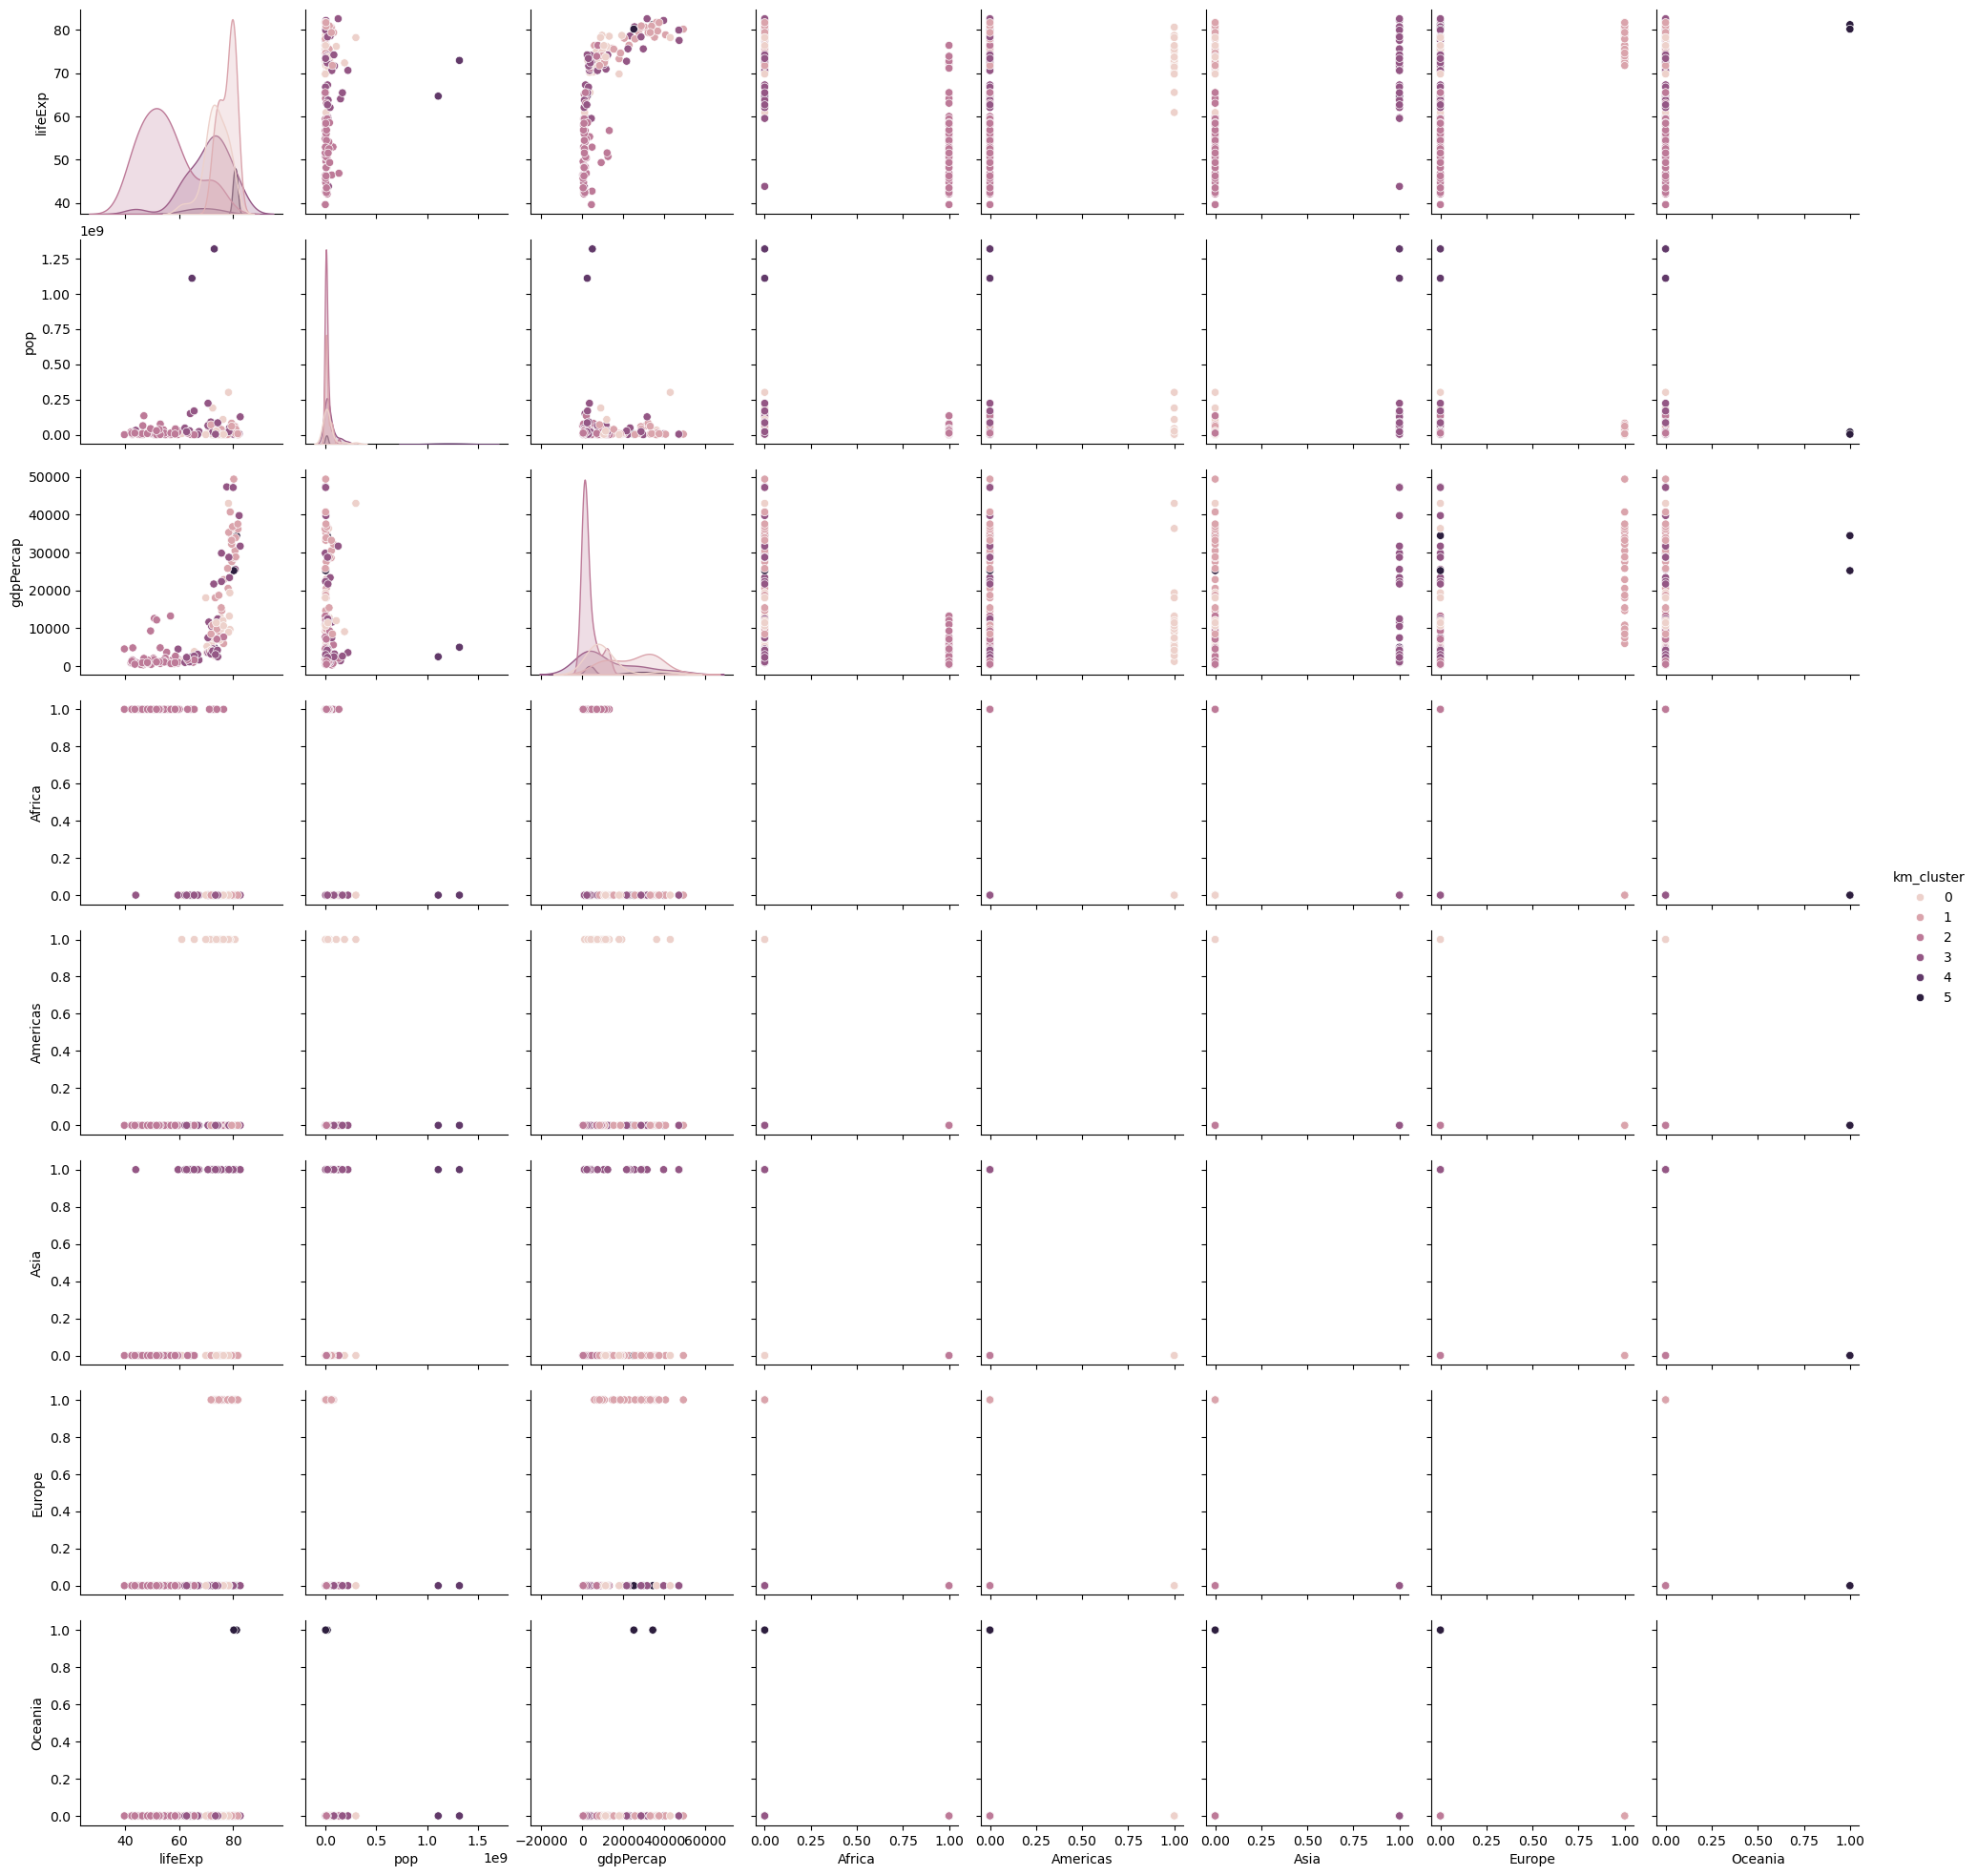

In [325]:
# Method 1: Pairplots/Scatterplots
sns.pairplot(df, hue = 'km_cluster');

In [326]:
centroids = sc.inverse_transform(km.cluster_centers_)

centroids = pd.DataFrame(centroids, columns= X.columns)
centroids

,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania
0,73.60812,35954847.36000,11003.03163,0.00000,1.00000,-0.00000,0.00000,-0.00000
1,77.64860,19536617.63333,25054.48164,0.00000,0.00000,-0.00000,1.00000,-0.00000
2,54.80604,17875763.30769,3089.03260,1.00000,0.00000,0.00000,0.00000,0.00000
3,70.85100,44608851.61290,13038.66327,0.00000,0.00000,1.00000,0.00000,-0.00000
4,68.82950,1214539713.50000,3705.66263,0.00000,0.00000,1.00000,0.00000,0.00000
5,80.71950,12274973.50000,29810.18827,0.00000,0.00000,0.00000,0.00000,1.00000


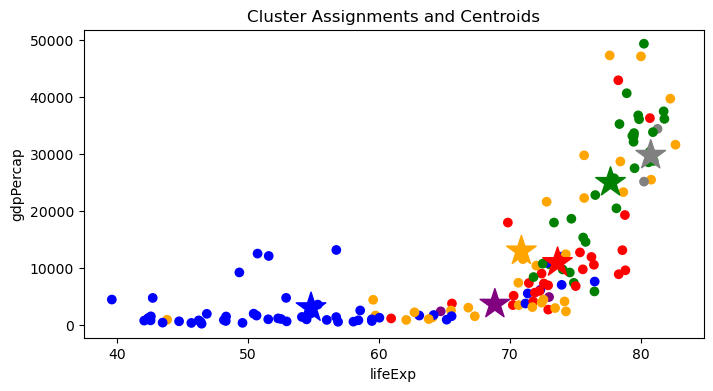

In [328]:
# Set figure size
plt.figure(figsize=(8,4))

# Map colors for different clusters
colors = ['red', 'green', 'blue', 'orange', 'purple', 'grey']
df['color'] = df['km_cluster'].map(lambda p: colors[p])

# Plot points
plt.scatter(df['lifeExp'], df['gdpPercap'], c=df['color'])

# Plot Centroids
plt.scatter(centroids['lifeExp'], centroids['gdpPercap'],  # Use column names since centroids is a DataFrame
           c=colors,                           # Use same color scheme
           marker='*',                         # Star marker for centroids
           s=500,                              # Large size for centroids
           label='Centroids')

# Add labels and title
plt.xlabel('lifeExp')
plt.ylabel('gdpPercap')
plt.title('Cluster Assignments and Centroids')
#plt.legend()

# Show plot
plt.show()

In [329]:
df['km_cluster'].unique()

array([3, 1, 2, 0, 5, 4])

In [330]:
# Method 2: Groupby
check = df.select_dtypes(exclude = 'object')
check.groupby('km_cluster').mean()

,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania
km_cluster,,,,,,,,
0,73.60812,35954847.36000,11003.03163,0.00000,1.00000,0.00000,0.00000,0.00000
1,77.64860,19536617.63333,25054.48164,0.00000,0.00000,0.00000,1.00000,0.00000
2,54.80604,17875763.30769,3089.03260,1.00000,0.00000,0.00000,0.00000,0.00000
3,70.85100,44608851.61290,13038.66327,0.00000,0.00000,1.00000,0.00000,0.00000
4,68.82950,1214539713.50000,3705.66263,0.00000,0.00000,1.00000,0.00000,0.00000
5,80.71950,12274973.50000,29810.18827,0.00000,0.00000,0.00000,0.00000,1.00000


#### An Even Closer Look...Which countries are in each of these clusters?

In [332]:
df.reset_index(inplace=True)
df.head()

,country,continent,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania,km_cluster,color
0,Afghanistan,Asia,43.82800,31889923,974.58034,False,False,True,False,False,3,orange
1,Albania,Europe,76.42300,3600523,5937.02953,False,False,False,True,False,1,green
2,Algeria,Africa,72.30100,33333216,6223.36747,True,False,False,False,False,2,blue
3,Angola,Africa,42.73100,12420476,4797.23127,True,False,False,False,False,2,blue
4,Argentina,Americas,75.32000,40301927,12779.37964,False,True,False,False,False,0,red


In [333]:
for cluster in sorted(df['km_cluster'].unique()):
    print(f'Cluster: {cluster+1}')
    print(', '.join(df[df['km_cluster']==cluster]['country'].unique()))
    print()

Cluster: 1
Argentina, Bolivia, Brazil, Canada, Chile, Colombia, Costa Rica, Cuba, Dominican Republic, Ecuador, El Salvador, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Paraguay, Peru, Puerto Rico, Trinidad and Tobago, United States, Uruguay, Venezuela

Cluster: 2
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom

Cluster: 3
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Reunion, Rwand

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [335]:
from itertools import product

epsilon_list = [1.2, 1.5, 1.8, 2, 2.5, 3, 3.2]
min_sample_list = range(4, 11, 2)
score_list = []

for eps, min_sam in product(epsilon_list, min_sample_list):
    dbscan = DBSCAN(eps=eps, min_samples=min_sam)
    dbscan.fit(X_sc)
    
    score_list.append({
        'epsilon': eps,
        'min_sample': min_sam,
        'silhouette_score': silhouette_score(X_sc, dbscan.labels_)
    })

score_list_df = pd.DataFrame(score_list)
score_list_df.sort_values(by = ['silhouette_score','min_sample'], ascending = [False,True]).head()

,epsilon,min_sample,silhouette_score
12,2.00000,4,0.65969
16,2.50000,4,0.65969
20,3.00000,4,0.65969
13,2.00000,6,0.65969
17,2.50000,6,0.65969


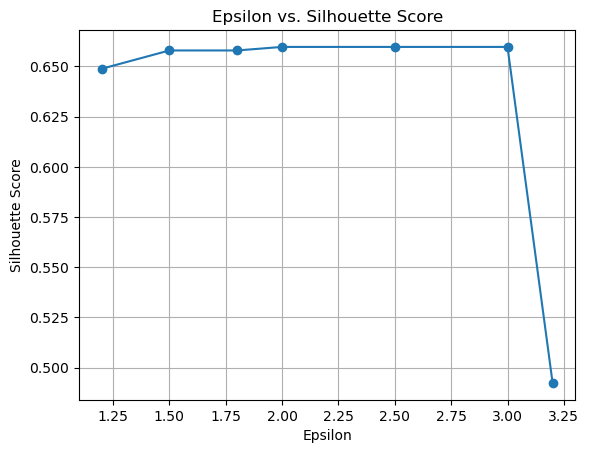

In [369]:
# only min_sample =4
score_list_4sample = score_list_df[score_list_df['min_sample']==4]

results = plt.plot(score_list_4sample['epsilon'],score_list_4sample['silhouette_score'], marker = 'o' )
plt.title('Epsilon vs. Silhouette Score')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.grid(True)

In [337]:
# Best epsilon = 2,2.5,3 for min_sample = 4

In [338]:
dbscan = DBSCAN(eps=2.5, min_samples=4)

dbscan.fit(X_sc)

DBSCAN(eps=2.5, min_samples=4)

In [339]:
pd.Series(dbscan.labels_).value_counts()

 2    52
 0    31
 1    30
 3    25
-1     4
Name: count, dtype: int64

In [340]:
X.head()

,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,False,False,True,False,False
Albania,76.42300,3600523,5937.02953,False,False,False,True,False
Algeria,72.30100,33333216,6223.36747,True,False,False,False,False
Angola,42.73100,12420476,4797.23127,True,False,False,False,False
Argentina,75.32000,40301927,12779.37964,False,True,False,False,False


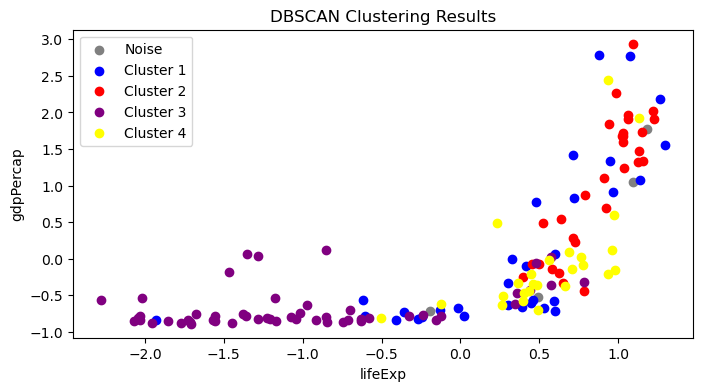

In [341]:
plt.figure(figsize=(8, 4))

colors = {-1: 'grey', 0: 'blue', 1: 'red', 2: 'purple', 3: 'yellow'}  # Color map for each label
labels = {-1: 'Noise', 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'}  # Legend labels

for label, color in colors.items():  # Fix: Use .items() for dictionary iteration
    mask = dbscan.labels_ == label  # Fix: Use dbscan.labels_ to access cluster labels
    plt.scatter(X_sc[mask, 0], X_sc[mask, 2], c=color, label=labels[label])

plt.title('DBSCAN Clustering Results')
plt.xlabel('lifeExp')
plt.ylabel('gdpPercap')
plt.legend()
plt.show()

In [342]:
print(f'Silhouette score from K-Means model :{silhouette_score(X_sc,km.labels_):.4f}')
print(f'Silhouette score from DBSCAN model :{silhouette_score(X_sc,dbscan.labels_):.4f}')
# K means better than DBSCAN

Silhouette score from K-Means model :0.6841
Silhouette score from DBSCAN model :0.6597


In [344]:
df['dbscan_cluster'] = dbscan.labels_

In [345]:
for cluster in sorted(df['dbscan_cluster'].unique()):
    if cluster == -1:
        print(f'Cluster: Noise')
    else:
        print(f'Cluster: {cluster+1}')
    print(', '.join(df[df['dbscan_cluster']==cluster]['country'].unique()))
    print()

Cluster: Noise
Australia, China, India, New Zealand

Cluster: 1
Afghanistan, Bahrain, Bangladesh, Cambodia, Hong Kong, China, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Korea, Dem. Rep., Korea, Rep., Kuwait, Lebanon, Malaysia, Mongolia, Myanmar, Nepal, Oman, Pakistan, Philippines, Saudi Arabia, Singapore, Sri Lanka, Syria, Taiwan, Thailand, Vietnam, West Bank and Gaza, Yemen, Rep.

Cluster: 2
Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom

Cluster: 3
Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Djibouti, Egypt, Equatorial Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, L

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 